In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [27]:
!pip install openpyxl


# Read in the ground truth file

This contains the sieve size data that was originally used to train SediNet (Buscombe 2021)

In [28]:
#read the excel file called '../data/SediNet-training.xlsx' into a pandas dataframe called 'df
df = pd.read_excel('../../data/SediNet-training.xlsx')
df

,objectid,ATT ID,ImageName,Name,Coin,d10,d16,d25,d50,d65,d75,d84,d90,mean,Latitude,Longitude
0,1.0,1,ATT1_Sediment_Playa_Villa_Pesquera_Patillas_Pu...,PR001,quarter,0.112616,0.122476,0.134806,0.166364,0.198882,0.226864,0.249914,0.322672,0.172041,17.973859,-65.988747
1,2.0,2,ATT2_20200531_151022.jpg,PR002,dime,0.428245,0.452165,0.490573,0.606101,0.654565,0.689009,0.749384,0.815557,0.589995,18.458983,-65.986842
2,3.0,3,ATT3_IMG_20200619_123813.jpg,LB06192020 Swash,quarter,1.198173,1.047530,0.856321,0.698469,0.655920,0.629003,0.605724,0.591365,0.762423,40.284599,-73.981407
3,4.0,4,ATT4_2471FF73-CE00-470D-97F8-9F4169EF5546.jpeg,DSS Fordune,quarter,0.271014,0.301965,0.342689,0.396260,0.434992,0.478633,0.521641,0.552439,0.396676,38.665109,-75.067763
4,5.0,5,ATT5_C7809DDB-E022-45EA-9559-EA3F86F35B4B.jpeg,DSS berm/beach,quarter,0.295353,0.337247,0.375598,0.497587,0.606495,0.679202,0.774394,0.887155,0.506516,38.665189,-75.067055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,NaN,DK3,DK3_IMG_20200205_152945.jpg,"N. Indian River Inlet, DE Berm",quarter,0.216603,0.250342,0.289862,0.375094,0.401310,0.421517,0.484943,0.532444,0.357099,38.611033,-75.063257
66,NaN,DK4,DK4_IMG_20200205_153251.jpg,"N. Indian River Inlet, DE Dune Toe",quarter,0.266897,0.285153,0.314906,0.414869,0.474468,0.518180,0.560954,0.591414,0.404860,38.610892,-75.063450
67,213.0,DK5,DK5_IMG_20200205_153253.jpg,"N. Indian River Inlet, DE Dune Toe",quarter,0.266897,0.285153,0.314906,0.414869,0.474468,0.518180,0.560954,0.591414,0.404860,38.610892,-75.063450
68,215.0,DK6,DK6_IMG-0353.jpg,St Augustine Berm,quarter,0.199286,0.220408,0.243697,0.339142,0.397277,0.465445,0.574513,0.669973,0.350189,29.854100,-81.264700


In [29]:
#change the column 'objectid' to integer if it's not NaN
df['objectid'] = df['objectid'].astype('Int64')
df

,objectid,ATT ID,ImageName,Name,Coin,d10,d16,d25,d50,d65,d75,d84,d90,mean,Latitude,Longitude
0,1,1,ATT1_Sediment_Playa_Villa_Pesquera_Patillas_Pu...,PR001,quarter,0.112616,0.122476,0.134806,0.166364,0.198882,0.226864,0.249914,0.322672,0.172041,17.973859,-65.988747
1,2,2,ATT2_20200531_151022.jpg,PR002,dime,0.428245,0.452165,0.490573,0.606101,0.654565,0.689009,0.749384,0.815557,0.589995,18.458983,-65.986842
2,3,3,ATT3_IMG_20200619_123813.jpg,LB06192020 Swash,quarter,1.198173,1.047530,0.856321,0.698469,0.655920,0.629003,0.605724,0.591365,0.762423,40.284599,-73.981407
3,4,4,ATT4_2471FF73-CE00-470D-97F8-9F4169EF5546.jpeg,DSS Fordune,quarter,0.271014,0.301965,0.342689,0.396260,0.434992,0.478633,0.521641,0.552439,0.396676,38.665109,-75.067763
4,5,5,ATT5_C7809DDB-E022-45EA-9559-EA3F86F35B4B.jpeg,DSS berm/beach,quarter,0.295353,0.337247,0.375598,0.497587,0.606495,0.679202,0.774394,0.887155,0.506516,38.665189,-75.067055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,<NA>,DK3,DK3_IMG_20200205_152945.jpg,"N. Indian River Inlet, DE Berm",quarter,0.216603,0.250342,0.289862,0.375094,0.401310,0.421517,0.484943,0.532444,0.357099,38.611033,-75.063257
66,<NA>,DK4,DK4_IMG_20200205_153251.jpg,"N. Indian River Inlet, DE Dune Toe",quarter,0.266897,0.285153,0.314906,0.414869,0.474468,0.518180,0.560954,0.591414,0.404860,38.610892,-75.063450
67,213,DK5,DK5_IMG_20200205_153253.jpg,"N. Indian River Inlet, DE Dune Toe",quarter,0.266897,0.285153,0.314906,0.414869,0.474468,0.518180,0.560954,0.591414,0.404860,38.610892,-75.063450
68,215,DK6,DK6_IMG-0353.jpg,St Augustine Berm,quarter,0.199286,0.220408,0.243697,0.339142,0.397277,0.465445,0.574513,0.669973,0.350189,29.854100,-81.264700


In [30]:
#replace all values of 'objectid' that are NaN with 0
df['objectid'] = df['objectid'].fillna(0)


Check for outliers

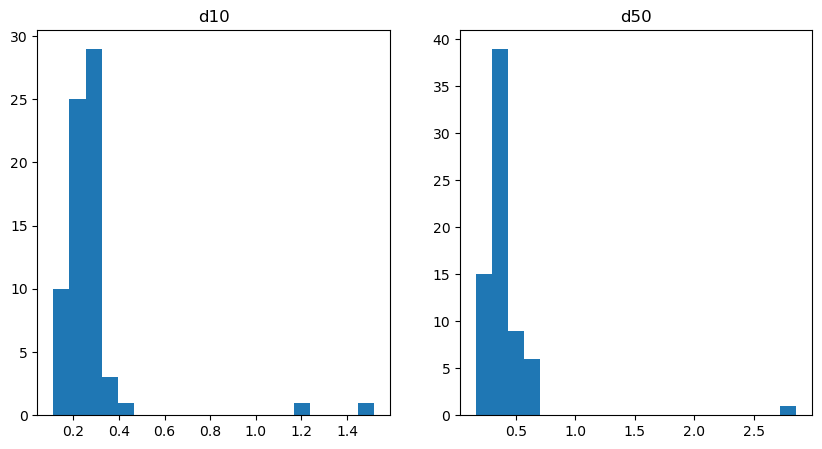

In [31]:
#create 2 histograms side by side for the columns 'd10' and 'd50' in df
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(df['d10'], bins=20)
ax1.set_title('d10')
ax2.hist(df['d50'], bins=20)
ax2.set_title('d50')
plt.show()


In [32]:
df[df.d10 > 1.0]

,objectid,ATT ID,ImageName,Name,Coin,d10,d16,d25,d50,d65,d75,d84,d90,mean,Latitude,Longitude
2,3,3,ATT3_IMG_20200619_123813.jpg,LB06192020 Swash,quarter,1.198173,1.047530,0.856321,0.698469,0.655920,0.629003,0.605724,0.591365,0.762423,40.284599,-73.981407
36,46,46,ATT46_IMG_20201015_102952510_HDR.jpg,Elwho Beach (spelling?) 15 Oct 2020,quarter,1.517215,1.784506,2.185454,2.857490,3.155398,3.379437,3.751294,4.044219,2.674410,48.149682,-123.555273


ObjectID #3 had a decreasing distribution: either it's reversed or garbage. Drop it!

In [33]:
#drop objetcid 3
df = df[df['objectid'] != 3]
len(df)


69

We also need to read in the SandSnap database to get the dates, since most of these datapoints are in that. This file does not have dates

So let's merge them

In [34]:
df_sandsnap = pd.read_csv('../../data/sandsnap-world.csv')
df_sandsnap

,objectid,GlobalID,City,Sample ID,Coin Reference,Location on Beach,Other,CreationDate,Creator,EditDate,...,coin_minor_axis_dim,blurry_metric,ab_value,pixel_count,reprocess_record,reprocess_all_records,Calculated Grain Size,Analysis Status,x,y
0,1,b751cc5c-4da0-4179-8aa9-09a076d39023,Patillas,PR001,quarter,the_swash,NaN,6/11/21 17:28,rose.dopsovic,2/28/22 18:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-65.988747,17.973859
1,2,7cc3efe2-0597-4311-8727-eafcbd442b7f,Loiza,PR002,dime,the_berm,NaN,6/11/21 17:28,rose.dopsovic,2/28/22 18:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-65.986842,18.458983
2,4,8548bce2-a7bb-4060-84ab-7977603a9185,Rehoboth DE Delaware State Seashore,DSS_foredune,quarter,the_dune,NaN,6/11/21 17:28,rose.dopsovic,2/28/22 18:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-75.067763,38.665109
3,5,10e8ac4c-08a7-4389-828f-9178d03eb3e2,Rehoboth DE Delaware State Seashore,Dss_berm/beach,quarter,"the_berm,other",Beach,6/11/21 17:28,rose.dopsovic,2/28/22 18:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-75.067055,38.665189
4,6,1bd95bf0-71eb-441a-8e07-fcdbf25f21c6,Rehoboth DE Delaware State Seashore,Dss-swash,quarter,the_swash,NaN,6/11/21 17:28,rose.dopsovic,2/28/22 18:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-75.066829,38.665184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,1223,aa73d420-8cc1-4858-8333-5d4bd8142831,Vicksburg,Officelighttestelighttest5,nickel,other,NaN,3/10/23 16:11,NaN,3/10/23 16:13,...,NaN,NaN,NaN,NaN,NO,NaN,Pending Analysis,Pending Analysis,-90.866163,32.298973
768,1225,592e3c12-6bc2-4435-8cc0-099cdb1c2c98,Vicksburg,Officelighttestelighttest6,nickel,other,NaN,3/10/23 16:29,NaN,3/10/23 16:31,...,NaN,NaN,NaN,NaN,NO,NaN,Pending Analysis,Pending Analysis,-90.866163,32.298969
769,1226,dd0d8b2f-5e70-4c3f-8b10-6db5c8bf4dbc,Fort Pierce,NaN,nickel,the_dune,NaN,3/13/23 17:44,NaN,3/13/23 17:46,...,NaN,NaN,NaN,NaN,NO,NaN,Pending Analysis,Pending Analysis,-80.285356,27.451504
770,1227,f00e2e34-4409-45f8-8ea9-5479e6ecf386,Ft Pierce,NaN,nickel,the_berm,NaN,3/13/23 17:49,NaN,3/13/23 17:50,...,NaN,NaN,NaN,NaN,NO,NaN,Pending Analysis,Pending Analysis,-80.284365,27.452367


In [35]:
#merge df and df_sandsnap on the column 'objectid' but keep all rows from df only, discard rows from df_sandsnap that don't have a match in df
#keep only the column called 'Picture Date' from df_sandsnap
df_merged = df.merge(df_sandsnap[['objectid', 'Picture Date', 'Location on Beach', 'City']], on='objectid', how='left')
#rename the column 'Picture Date' to 'date'
df_merged = df_merged.rename(columns={'Picture Date': 'date', 'Location on Beach': 'location'})
df_merged

,objectid,ATT ID,ImageName,Name,Coin,d10,d16,d25,d50,d65,d75,d84,d90,mean,Latitude,Longitude,date,location,City
0,1,1,ATT1_Sediment_Playa_Villa_Pesquera_Patillas_Pu...,PR001,quarter,0.112616,0.122476,0.134806,0.166364,0.198882,0.226864,0.249914,0.322672,0.172041,17.973859,-65.988747,6/18/20 4:00,the_swash,Patillas
1,2,2,ATT2_20200531_151022.jpg,PR002,dime,0.428245,0.452165,0.490573,0.606101,0.654565,0.689009,0.749384,0.815557,0.589995,18.458983,-65.986842,6/15/20 4:00,the_berm,Loiza
2,4,4,ATT4_2471FF73-CE00-470D-97F8-9F4169EF5546.jpeg,DSS Fordune,quarter,0.271014,0.301965,0.342689,0.396260,0.434992,0.478633,0.521641,0.552439,0.396676,38.665109,-75.067763,6/22/20 4:00,the_dune,Rehoboth DE Delaware State Seashore
3,5,5,ATT5_C7809DDB-E022-45EA-9559-EA3F86F35B4B.jpeg,DSS berm/beach,quarter,0.295353,0.337247,0.375598,0.497587,0.606495,0.679202,0.774394,0.887155,0.506516,38.665189,-75.067055,6/22/20 4:00,"the_berm,other",Rehoboth DE Delaware State Seashore
4,6,6,ATT6_B803E195-0A46-4D78-9D45-CA9AEC58E277.jpeg,DSS Swash,quarter,0.267993,0.307443,0.361525,0.483608,0.614146,0.704910,0.810521,0.978358,0.493940,38.665184,-75.066829,6/22/20 4:00,the_swash,Rehoboth DE Delaware State Seashore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0,DK3,DK3_IMG_20200205_152945.jpg,"N. Indian River Inlet, DE Berm",quarter,0.216603,0.250342,0.289862,0.375094,0.401310,0.421517,0.484943,0.532444,0.357099,38.611033,-75.063257,NaN,NaN,NaN
65,0,DK4,DK4_IMG_20200205_153251.jpg,"N. Indian River Inlet, DE Dune Toe",quarter,0.266897,0.285153,0.314906,0.414869,0.474468,0.518180,0.560954,0.591414,0.404860,38.610892,-75.063450,NaN,NaN,NaN
66,213,DK5,DK5_IMG_20200205_153253.jpg,"N. Indian River Inlet, DE Dune Toe",quarter,0.266897,0.285153,0.314906,0.414869,0.474468,0.518180,0.560954,0.591414,0.404860,38.610892,-75.063450,2/12/20 5:00,the_dune,Rehoboth Beach
67,215,DK6,DK6_IMG-0353.jpg,St Augustine Berm,quarter,0.199286,0.220408,0.243697,0.339142,0.397277,0.465445,0.574513,0.669973,0.350189,29.854100,-81.264700,3/11/20 4:00,the_berm,St. Augustine


For missing dates, manually find the ones closest to the missing items and replace their IDs so they get the IDs of another entry

In [36]:
#old ID, new ID
ID_mapping = {3:12,
              28:27,
              29:30,
              37:36,
              }
ID_mapping

{3: 12, 28: 27, 29: 30, 37: 36}

Or just drop them for now

In [37]:
#look for any NaN values in the column 'date' or 'Longitude' or 'Latitude'
df_merged[df_merged['date'].isna() | df_merged['Longitude'].isna() | df_merged['Latitude'].isna()]

,objectid,ATT ID,ImageName,Name,Coin,d10,d16,d25,d50,d65,d75,d84,d90,mean,Latitude,Longitude,date,location,City
21,28,28,ATT28_IMG_20200902_094947.jpg,Nesk 3 Above Rockline (MHHW),quarter,0.219983,0.230262,0.246590,0.271602,0.286972,0.298185,0.317868,0.331707,0.270895,45.137821,-123.976653,NaN,NaN,NaN
22,29,29,ATT29_IMG_20200902_095430.jpg,Nesk 4 (Above rockline),quarter,0.258710,0.272155,0.293644,0.329261,0.351446,0.377384,0.403547,0.432576,0.330687,45.131877,-123.978318,NaN,NaN,NaN
30,37,37,ATT37_IMG_20200903_104146.jpg,Nesk 11 (Rockline),quarter,0.245652,0.257640,0.273124,0.311133,0.329525,0.342386,0.357772,0.387967,0.306094,45.181050,-123.970187,NaN,NaN,NaN
38,50,50,ATT50_16040097178737819159967641904657.jpg,Malibu Corral Beach,quarter,0.272783,0.305846,0.339828,0.455169,0.542039,0.610033,0.682504,0.769506,0.456310,34.076104,-117.203972,NaN,NaN,NaN
40,52,52,ATT52_16046158662007690554262945538181.jpg,Zuma Beach Malibu,quarter,0.154358,0.182762,0.214214,0.237397,0.256129,0.278105,0.305130,0.361052,0.236564,34.021950,-118.831760,NaN,NaN,NaN
51,0,87,ATT87_234C0D33-6A44-4460-A75F-C69D79B2985C.jpeg,"PBCK53021 Pensacola Beach, Fl Gulf Side",quarter,0.299964,0.314855,0.338590,0.404502,0.461502,0.509018,0.555951,0.589620,0.413704,30.325540,-87.179350,NaN,NaN,NaN
55,300,BM1,BM1_3339CF1F-C644-4D55-B0A5-DED60F28A319.jpeg,Anna Maria Island FL. Holmes Beach #ACF91564.1...,quarter,0.151583,0.172495,0.198377,0.264194,0.388519,0.634435,0.952099,1.234602,0.351394,27.498464,-82.713626,NaN,the_berm,Anna Maria Island
56,307,BM2,BM2_IMG_20200129_103207.jpg,01282020 Boynton Inlet,quarter,0.273080,0.305711,0.352155,0.417699,0.506273,0.576716,0.661626,0.750524,0.438796,26.544083,-80.043510,NaN,the_berm,Boynton Beach
57,303,BM3,BM3_IMG_20200129_083839.jpg,"01282020Delray Beach, FL",quarter,0.241002,0.263953,0.297877,0.386438,0.444860,0.517894,0.593823,0.663251,0.392724,26.441283,-80.060453,NaN,the_berm,Delray Beach
58,305,BM4,BM4_IMG_20200129_091029.jpg,01282020Delray Beach 3,quarter,0.270351,0.303577,0.346965,0.418111,0.505912,0.575197,0.658036,0.742721,0.437123,26.472315,-80.055729,NaN,the_berm,Delray Beach


In [38]:
len(df_merged[df_merged['date'].isna() | df_merged['Longitude'].isna() | df_merged['Latitude'].isna()])

16

In [39]:
#look for any NaN values in the column 'date' or 'Longitude' or 'Latitude' in df_merged and drop them
df_merged = df_merged.dropna(subset=['date', 'Longitude', 'Latitude']).reset_index(drop=True)
df_merged

,objectid,ATT ID,ImageName,Name,Coin,d10,d16,d25,d50,d65,d75,d84,d90,mean,Latitude,Longitude,date,location,City
0,1,1,ATT1_Sediment_Playa_Villa_Pesquera_Patillas_Pu...,PR001,quarter,0.112616,0.122476,0.134806,0.166364,0.198882,0.226864,0.249914,0.322672,0.172041,17.973859,-65.988747,6/18/20 4:00,the_swash,Patillas
1,2,2,ATT2_20200531_151022.jpg,PR002,dime,0.428245,0.452165,0.490573,0.606101,0.654565,0.689009,0.749384,0.815557,0.589995,18.458983,-65.986842,6/15/20 4:00,the_berm,Loiza
2,4,4,ATT4_2471FF73-CE00-470D-97F8-9F4169EF5546.jpeg,DSS Fordune,quarter,0.271014,0.301965,0.342689,0.396260,0.434992,0.478633,0.521641,0.552439,0.396676,38.665109,-75.067763,6/22/20 4:00,the_dune,Rehoboth DE Delaware State Seashore
3,5,5,ATT5_C7809DDB-E022-45EA-9559-EA3F86F35B4B.jpeg,DSS berm/beach,quarter,0.295353,0.337247,0.375598,0.497587,0.606495,0.679202,0.774394,0.887155,0.506516,38.665189,-75.067055,6/22/20 4:00,"the_berm,other",Rehoboth DE Delaware State Seashore
4,6,6,ATT6_B803E195-0A46-4D78-9D45-CA9AEC58E277.jpeg,DSS Swash,quarter,0.267993,0.307443,0.361525,0.483608,0.614146,0.704910,0.810521,0.978358,0.493940,38.665184,-75.066829,6/22/20 4:00,the_swash,Rehoboth DE Delaware State Seashore
5,7,7,ATT7_24FE8C15-C9BF-4BEB-AFF8-D99583A7CC17.jpeg,1 BSP_FB,dime,0.252075,0.264239,0.283594,0.335226,0.368595,0.392667,0.415673,0.473192,0.332682,39.792731,-74.093533,6/24/21 4:00,the_dune,Island Beach State Park
6,8,8,ATT8_FC2C1955-9264-48AC-A3B7-8DE6B5C372A3.jpeg,1 BSP_Berm high tide line,dime,0.290618,0.309638,0.333881,0.411651,0.469632,0.513106,0.555662,0.585976,0.413743,39.792688,-74.092696,6/24/20 4:00,"the_berm,other",Island Beach State Park
7,9,9,ATT9_DFD3971E-94F4-4EDF-91A7-79C24777A2E1.jpeg,1 BSP_Swash,dime,0.265471,0.286450,0.325745,0.385778,0.412782,0.458610,0.518248,0.562256,0.385456,39.792718,-74.092544,6/24/20 4:00,"the_swash,other",Island Beach State Park
8,10,10,ATT10_20200704_132718.jpg,LBM003,nickle,0.221913,0.234935,0.254388,0.306921,0.344988,0.372954,0.400057,0.420014,0.306689,18.445288,-65.926584,7/6/20 4:00,the_berm,Loiza
9,12,12,ATT12_151E877F-B985-4CE7-8A5A-2FED3048412E.jpeg,LB06192020 High,quarter,0.317068,0.344587,0.390409,0.515834,0.601972,0.657990,0.720403,0.806340,0.504036,40.284439,-73.982206,7/14/20 4:00,other,Long Branch


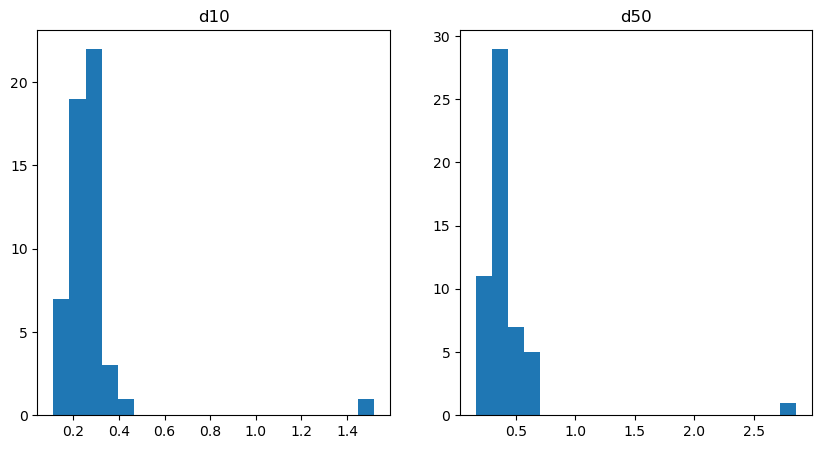

In [40]:
#create 2 histograms side by side for the columns 'd10' and 'd50' in df
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(df_merged['d10'], bins=20)
ax1.set_title('d10')
ax2.hist(df_merged['d50'], bins=20)
ax2.set_title('d50')
plt.show()

In [41]:
df_merged.dtypes

objectid       Int64
ATT ID        object
ImageName     object
Name          object
Coin          object
d10          float64
d16          float64
d25          float64
d50          float64
d65          float64
d75          float64
d84          float64
d90          float64
mean         float64
Latitude     float64
Longitude    float64
date          object
location      object
City          object
dtype: object

In [42]:
df_merged[df_merged.d50 > 1.0]

,objectid,ATT ID,ImageName,Name,Coin,d10,d16,d25,d50,d65,d75,d84,d90,mean,Latitude,Longitude,date,location,City
32,46,46,ATT46_IMG_20201015_102952510_HDR.jpg,Elwho Beach (spelling?) 15 Oct 2020,quarter,1.517215,1.784506,2.185454,2.85749,3.155398,3.379437,3.751294,4.044219,2.67441,48.149682,-123.555273,10/15/20 4:00,the_swash,Port Angeles


## What is sand

Let's first define what sand is

### Version A: Fineness Modulus (FM)
FM = SUM(% cumulative passing sieve) / 100

Where sieve sizes are defines in the table below
| Sieve Number      | Diameter |
| ----------- | ----------- |
| #?      | 10mm       |
| #4      | 4.75mm       |
| #8      | 2.36mm       |
| #16      | 1.18mm       |
| #30      | 0.60mm       |
| #100      | 0.150mm       |

Grab the D* scale and fit a Nth order curve to it

In [217]:
#grab only the columns of df_merged that start with 'd' and is followed by a number
sieve_df = df_merged.filter(regex='^d\d+$')

#rename the columns of sieve_df to be the number that follows 'd'
sieve_df.columns = sieve_df.columns.str.replace('d', '')

sieve_df.head()
#iterate over sieve_df and fit a curve to each row and plot it
# for i in range(len(sieve_df)):
#     plt.plot(sieve_df.iloc[i])
# plt.show()



,10,16,25,50,65,75,84,90
0,0.112616,0.122476,0.134806,0.166364,0.198882,0.226864,0.249914,0.322672
1,0.428245,0.452165,0.490573,0.606101,0.654565,0.689009,0.749384,0.815557
2,0.271014,0.301965,0.342689,0.396260,0.434992,0.478633,0.521641,0.552439
3,0.295353,0.337247,0.375598,0.497587,0.606495,0.679202,0.774394,0.887155
4,0.267993,0.307443,0.361525,0.483608,0.614146,0.704910,0.810521,0.978358


## Test Stuff

In [45]:
sample = sieve_df.iloc[11]
sample = sieve_df.iloc[32]
sample



10    1.517215
16    1.784506
25    2.185454
50    2.857490
65    3.155398
75    3.379437
84    3.751294
90    4.044219
Name: 32, dtype: float64

In [46]:
def adjR(x, y, model):
    degree = model.order
    # coeffs = np.polyfit(x, y, degree)
    # print (coeffs)
    # p = np.poly1d(coeffs)
    yhat = model(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    return 1 - (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))


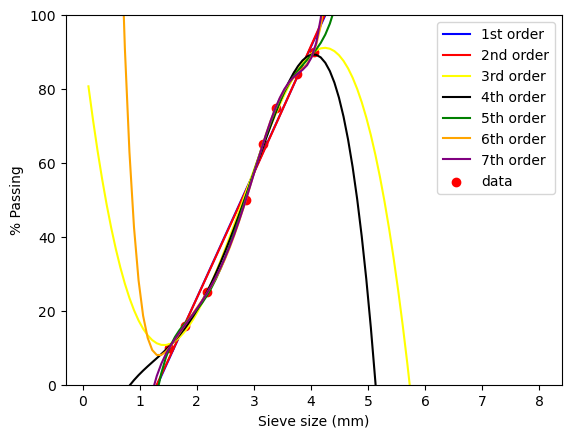

In [51]:
#plot the curve
curve1 = np.polyfit(sample, sample.index.astype(float).tolist(), 1)
curve2 = np.polyfit(sample, sample.index.astype(float).tolist(), 2)
curve3 = np.polyfit(sample, sample.index.astype(float).tolist(), 3)
curve4 = np.polyfit(sample, sample.index.astype(float).tolist(), 4)
curve5 = np.polyfit(sample, sample.index.astype(float).tolist(),  5)
curve6 = np.polyfit(sample, sample.index.astype(float).tolist(),  6)
curve7 = np.polyfit(sample, sample.index.astype(float).tolist(), 7)

# x = np.linspace(0, 100, 100)
x = np.linspace(0.1, 8, 100)
y1 = np.polyval(curve1, x)
y2 = np.polyval(curve2, x)
y3 = np.polyval(curve3, x)
y4 = np.polyval(curve4, x)
y5 = np.polyval(curve5, x)
y6 = np.polyval(curve6, x)
y7 = np.polyval(curve7, x)
plt.plot(x, y1, color='blue')
plt.plot(x, y2, color='red')
plt.plot(x, y3, color='yellow')
plt.plot(x, y4, color='black')
plt.plot(x, y5, color='green')
plt.plot(x, y6, color='orange')
plt.plot(x, y7, color='purple')

plt.scatter(sample, sample.index.astype(float).tolist(), color='red')
plt.legend(['1st order', '2nd order', '3rd order', '4th order', '5th order', '6th order', '7th order','data'])
plt.ylim(0, 100)
plt.ylabel('% Passing')
plt.xlabel('Sieve size (mm)')
plt.show()


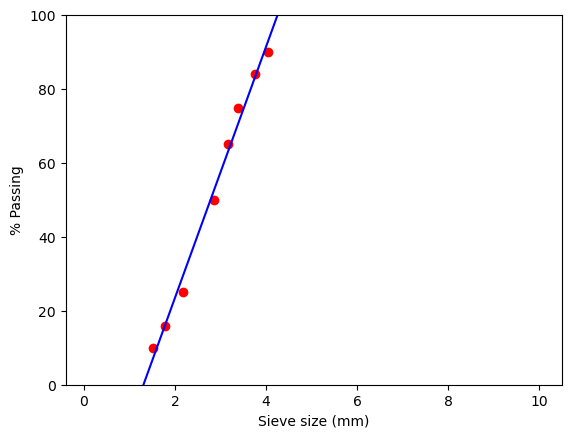

0.9874829420251319

9.332640194448874

In [ ]:
curve = np.poly1d(np.polyfit(sample, sample.index.astype(float).tolist(), 1))
x = np.linspace(0.1, 10, 100)
plt.plot(x, curve(x), color='blue')
plt.scatter( sample, sample.index.astype(float).tolist(), color='red')
plt.ylabel('% Passing')
plt.xlabel('Sieve size (mm)')
#restrict the y axis to 0-100
plt.ylim(0, 100)
plt.show()
display(adjR(sample, sample.index.astype(float).tolist(),  curve), mse(sample, sample.index.astype(float).tolist(), curve))


In [ ]:
#write a function to calculate the MSE of a curve
def mse(x, y, model):
    return np.sum((model(x) - y)**2)/len(y)

In [ ]:
adjR(x, sample, curve)

38.735885609804996

In [60]:
#import library for linear regression
from sklearn.linear_model import LinearRegression

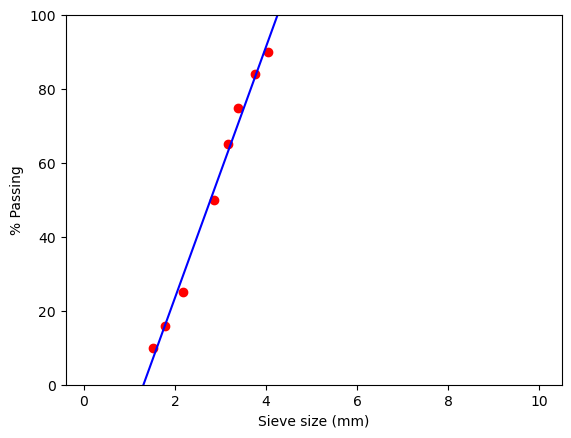

In [ ]:
#fit a linear regression model to sample, with the x values being the index of sample and the y values being the values of sample
model = LinearRegression().fit(sample.values.reshape(-1, 1), sample.index.astype(float).to_numpy().reshape(-1, 1))
#predict the y values for the x values in x
y_pred = model.predict(x.reshape(-1, 1))
#plot the predicted y values against the x values
plt.plot(x, y_pred, color='blue')
#plot the actual y values against the x values
plt.scatter(sample, sample.index.astype(float).tolist(), color='red')
plt.ylabel('% Passing')
plt.xlabel('Sieve size (mm)')
#restrict the y axis to 0-100
plt.ylim(0, 100)
plt.show()
#calculate the adjusted R^2 value
# display(adjR(sample, sample.index.astype(float).tolist(), model), mse(sample, sample.index.astype(float).tolist(), model))

In [ ]:
#write a logistic regression to fit sample and sample.index
import statsmodels.api as sm
logit_model=sm.OLS( sample.to_numpy(), sample.index.astype(float).to_numpy())  
result=logit_model.fit()
print(result.summary2())


                       Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.943   
Dependent Variable:     y                AIC:                         18.0658 
Date:                   2023-04-04 20:01 BIC:                         18.1453 
No. Observations:       8                Log-Likelihood:              -8.0329 
Df Model:               1                F-statistic:                 133.9   
Df Residuals:           7                Prob (F-statistic):          8.12e-06
R-squared (uncentered): 0.950            Scale:                       0.49852 
------------------------------------------------------------------------------------
          Coef.        Std.Err.          t          P>|t|        [0.025       0.975]
------------------------------------------------------------------------------------
x1        0.0484         0.0042       11.5708       0.0000       0.0385       0.0583
----------------------------------------------------

/Users/ando/miniforge3/envs/spatial/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Use statsmodels

### Define a standard sieve dataframe

In [195]:
std_sieves = pd.DataFrame({'d': [10., 4.75, 2.36, 1.18, 0.6, 0.3, 0.15]})

In [205]:
#convert the first row of sieve_df to a dataframe and name the column 'd' and the index 'percentage'
sample = sieve_df.iloc[11]
sample = sieve_df.iloc[32]
# sample = sieve_df.iloc[0]

sample = sample.to_frame()
sample.columns = ['d']
sample.index.name = 'percentage'
sample['percentage'] = sample.index.astype(float)
sample = sample.reset_index(drop=True)
sample

,d,percentage
0,1.517215,10.0
1,1.784506,16.0
2,2.185454,25.0
3,2.857490,50.0
4,3.155398,65.0
5,3.379437,75.0
6,3.751294,84.0
7,4.044219,90.0


/Users/ando/miniforge3/envs/spatial/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percentage   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     51.95
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           0.000361
Time:                        21:37:24   Log-Likelihood:                -29.354
No. Observations:                   8   AIC:                             62.71
Df Residuals:                       6   BIC:                             62.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.1522     11.629     -2.335      0.058     -55.608       1.303
d            411.9774     57.160      7.207      0.000     272.112     551.843
==============================================================================
Omnibus:                        2.138   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                0.869
Skew:                          -0.327   Prob(JB):                        0.648
Kurtosis:                       1.524   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='d', ylabel='percentage'>

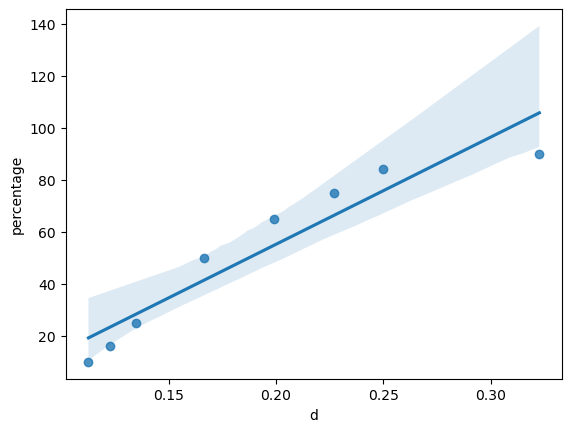

In [193]:

import statsmodels.formula.api as sm
# from statsmodels.graphics.regressionplots import abline_plot
import seaborn as sns

model = sm.ols(formula = 'percentage ~ d ', data = sample).fit() #+ I(d**2)
display(model.summary())

sns.regplot(data=sample, x='d', y='percentage', order=1)


In [197]:
def get_FM(std_sieves, sample):
    """
    Pass in a df of samples with 2 columns: d and percentage
    returns a tuple of the R2 and the Fineness modulus (FM)
    """

    model = sm.ols(formula = 'percentage ~ d ', data = sample).fit() #+ I(d**2)

    #predict the values of y for the values of x in model
    
    pred_df = model.predict(std_sieves)
    #apply a ceieling function to the predicted values to cap them at 100 and a floor at 0
    pred_df = pred_df.apply(lambda x: 100 if x > 100 else x)
    pred_df = pred_df.apply(lambda x: 0 if x < 0 else x)
    #sum up the pred_df
    FM = (100.0 - pred_df).sum()/100.0
    return (model.rsquared, FM)


In [200]:
get_FM(std_sieves, sample)

(0.9892710931643992, 4.642427455689742)

In [206]:
sieve_df['FM'] = 0.0
sieve_df.head()

/var/folders/7l/t9m_9fzn17zg2b00c5v2ft0c0000gn/T/ipykernel_74014/3978992845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sieve_df['FM'] = 0.0


percentage,10,16,25,50,65,75,84,90,FM
0,0.112616,0.122476,0.134806,0.166364,0.198882,0.226864,0.249914,0.322672,0.0
1,0.428245,0.452165,0.490573,0.606101,0.654565,0.689009,0.749384,0.815557,0.0
2,0.271014,0.301965,0.342689,0.396260,0.434992,0.478633,0.521641,0.552439,0.0
3,0.295353,0.337247,0.375598,0.497587,0.606495,0.679202,0.774394,0.887155,0.0
4,0.267993,0.307443,0.361525,0.483608,0.614146,0.704910,0.810521,0.978358,0.0


In [153]:
from statistics import mean

In [218]:
#create a new column for sieve_df called 'r2' that is empty
# sieve_df['r2'] = np.nan
r2, fm = [],[]
#iterate through each row of sieve_df
for i in range(len(sieve_df)):
    sample = sieve_df.iloc[i].copy()
    sample = sample.to_frame()
    sample.columns = ['d']
    sample.index.name = 'percentage'
    sample['percentage'] = sample.index.astype(float)
    sample = sample.reset_index(drop=True) 
    r2_sample, fm_sample = get_FM(std_sieves, sample)
    r2.append(r2_sample)
    fm.append(fm_sample)

mean(r2), fm
#convert the list fm to a column of sieve_df called 'FM'
sieve_df['FM'] = fm
sieve_df['r2'] = r2
sieve_df


/var/folders/7l/t9m_9fzn17zg2b00c5v2ft0c0000gn/T/ipykernel_74014/3663205973.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sieve_df['FM'] = fm
/var/folders/7l/t9m_9fzn17zg2b00c5v2ft0c0000gn/T/ipykernel_74014/3663205973.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sieve_df['r2'] = r2


,10,16,25,50,65,75,84,90,FM,r2
0,0.112616,0.122476,0.134806,0.166364,0.198882,0.226864,0.249914,0.322672,0.689146,0.896457
1,0.428245,0.452165,0.490573,0.606101,0.654565,0.689009,0.749384,0.815557,2.504750,0.985257
2,0.271014,0.301965,0.342689,0.396260,0.434992,0.478633,0.521641,0.552439,1.823772,0.983183
3,0.295353,0.337247,0.375598,0.497587,0.606495,0.679202,0.774394,0.887155,2.268347,0.966019
4,0.267993,0.307443,0.361525,0.483608,0.614146,0.704910,0.810521,0.978358,2.223582,0.947849
5,0.252075,0.264239,0.283594,0.335226,0.368595,0.392667,0.415673,0.473192,1.671056,0.964359
6,0.290618,0.309638,0.333881,0.411651,0.469632,0.513106,0.555662,0.585976,1.873572,0.992024
7,0.265471,0.286450,0.325745,0.385778,0.412782,0.458610,0.518248,0.562256,1.775130,0.962862
8,0.221913,0.234935,0.254388,0.306921,0.344988,0.372954,0.400057,0.420014,1.561306,0.995016
9,0.317068,0.344587,0.390409,0.515834,0.601972,0.657990,0.720403,0.806340,2.287053,0.986486


In [215]:
FM_min, FM_max = 1.71, 4.

In [216]:
#filter sieve_df to only include rows where the FM is between FM_min and FM_max and r2 is greater than 0.9
sieve_df = sieve_df[(sieve_df['FM'] >= FM_min) & (sieve_df['FM'] <= FM_max) & (sieve_df['r2'] > 0.9)]
sieve_df

,10,16,25,50,65,75,84,90,FM,r2
1,0.428245,0.452165,0.490573,0.606101,0.654565,0.689009,0.749384,0.815557,2.504750,0.985257
2,0.271014,0.301965,0.342689,0.396260,0.434992,0.478633,0.521641,0.552439,1.823772,0.983183
3,0.295353,0.337247,0.375598,0.497587,0.606495,0.679202,0.774394,0.887155,2.268347,0.966019
4,0.267993,0.307443,0.361525,0.483608,0.614146,0.704910,0.810521,0.978358,2.223582,0.947849
6,0.290618,0.309638,0.333881,0.411651,0.469632,0.513106,0.555662,0.585976,1.873572,0.992024
7,0.265471,0.286450,0.325745,0.385778,0.412782,0.458610,0.518248,0.562256,1.775130,0.962862
9,0.317068,0.344587,0.390409,0.515834,0.601972,0.657990,0.720403,0.806340,2.287053,0.986486
10,0.374594,0.431376,0.493043,0.653572,0.743638,0.826632,1.009580,1.171060,2.531590,0.938007
11,0.318333,0.351941,0.377920,0.465309,0.532642,0.582861,0.655921,0.726915,2.177204,0.966996
12,0.315686,0.337887,0.374150,0.490569,0.574320,0.643070,0.721920,0.824279,2.243870,0.965591


In [220]:
#merge sieve_df with the merged_df on the index of merged_df and keep all the columns from merged_df and only the columns 'FM' and 'r2' from sieve_df
fm_df = df_merged.merge(sieve_df[['FM', 'r2']], left_index=True, right_index=True)
fm_df

,objectid,ATT ID,ImageName,Name,Coin,d10,d16,d25,d50,d65,...,d84,d90,mean,Latitude,Longitude,date,location,City,FM,r2
0,1,1,ATT1_Sediment_Playa_Villa_Pesquera_Patillas_Pu...,PR001,quarter,0.112616,0.122476,0.134806,0.166364,0.198882,...,0.249914,0.322672,0.172041,17.973859,-65.988747,6/18/20 4:00,the_swash,Patillas,0.689146,0.896457
1,2,2,ATT2_20200531_151022.jpg,PR002,dime,0.428245,0.452165,0.490573,0.606101,0.654565,...,0.749384,0.815557,0.589995,18.458983,-65.986842,6/15/20 4:00,the_berm,Loiza,2.504750,0.985257
2,4,4,ATT4_2471FF73-CE00-470D-97F8-9F4169EF5546.jpeg,DSS Fordune,quarter,0.271014,0.301965,0.342689,0.396260,0.434992,...,0.521641,0.552439,0.396676,38.665109,-75.067763,6/22/20 4:00,the_dune,Rehoboth DE Delaware State Seashore,1.823772,0.983183
3,5,5,ATT5_C7809DDB-E022-45EA-9559-EA3F86F35B4B.jpeg,DSS berm/beach,quarter,0.295353,0.337247,0.375598,0.497587,0.606495,...,0.774394,0.887155,0.506516,38.665189,-75.067055,6/22/20 4:00,"the_berm,other",Rehoboth DE Delaware State Seashore,2.268347,0.966019
4,6,6,ATT6_B803E195-0A46-4D78-9D45-CA9AEC58E277.jpeg,DSS Swash,quarter,0.267993,0.307443,0.361525,0.483608,0.614146,...,0.810521,0.978358,0.493940,38.665184,-75.066829,6/22/20 4:00,the_swash,Rehoboth DE Delaware State Seashore,2.223582,0.947849
5,7,7,ATT7_24FE8C15-C9BF-4BEB-AFF8-D99583A7CC17.jpeg,1 BSP_FB,dime,0.252075,0.264239,0.283594,0.335226,0.368595,...,0.415673,0.473192,0.332682,39.792731,-74.093533,6/24/21 4:00,the_dune,Island Beach State Park,1.671056,0.964359
6,8,8,ATT8_FC2C1955-9264-48AC-A3B7-8DE6B5C372A3.jpeg,1 BSP_Berm high tide line,dime,0.290618,0.309638,0.333881,0.411651,0.469632,...,0.555662,0.585976,0.413743,39.792688,-74.092696,6/24/20 4:00,"the_berm,other",Island Beach State Park,1.873572,0.992024
7,9,9,ATT9_DFD3971E-94F4-4EDF-91A7-79C24777A2E1.jpeg,1 BSP_Swash,dime,0.265471,0.286450,0.325745,0.385778,0.412782,...,0.518248,0.562256,0.385456,39.792718,-74.092544,6/24/20 4:00,"the_swash,other",Island Beach State Park,1.775130,0.962862
8,10,10,ATT10_20200704_132718.jpg,LBM003,nickle,0.221913,0.234935,0.254388,0.306921,0.344988,...,0.400057,0.420014,0.306689,18.445288,-65.926584,7/6/20 4:00,the_berm,Loiza,1.561306,0.995016
9,12,12,ATT12_151E877F-B985-4CE7-8A5A-2FED3048412E.jpeg,LB06192020 High,quarter,0.317068,0.344587,0.390409,0.515834,0.601972,...,0.720403,0.806340,0.504036,40.284439,-73.982206,7/14/20 4:00,other,Long Branch,2.287053,0.986486


In [221]:
#create a new column of type 'str' in fm_df called 'class' and set it to 'fine' if the FM is less than 1.71 and 'coarse' if the FM is greater than 4 and 'sand' otherwise
fm_df['class'] = fm_df['FM'].apply(lambda x: 'fine' if x < 1.71 else 'coarse' if x > 4. else 'sand')
fm_df

,objectid,ATT ID,ImageName,Name,Coin,d10,d16,d25,d50,d65,...,d90,mean,Latitude,Longitude,date,location,City,FM,r2,class
0,1,1,ATT1_Sediment_Playa_Villa_Pesquera_Patillas_Pu...,PR001,quarter,0.112616,0.122476,0.134806,0.166364,0.198882,...,0.322672,0.172041,17.973859,-65.988747,6/18/20 4:00,the_swash,Patillas,0.689146,0.896457,fine
1,2,2,ATT2_20200531_151022.jpg,PR002,dime,0.428245,0.452165,0.490573,0.606101,0.654565,...,0.815557,0.589995,18.458983,-65.986842,6/15/20 4:00,the_berm,Loiza,2.504750,0.985257,sand
2,4,4,ATT4_2471FF73-CE00-470D-97F8-9F4169EF5546.jpeg,DSS Fordune,quarter,0.271014,0.301965,0.342689,0.396260,0.434992,...,0.552439,0.396676,38.665109,-75.067763,6/22/20 4:00,the_dune,Rehoboth DE Delaware State Seashore,1.823772,0.983183,sand
3,5,5,ATT5_C7809DDB-E022-45EA-9559-EA3F86F35B4B.jpeg,DSS berm/beach,quarter,0.295353,0.337247,0.375598,0.497587,0.606495,...,0.887155,0.506516,38.665189,-75.067055,6/22/20 4:00,"the_berm,other",Rehoboth DE Delaware State Seashore,2.268347,0.966019,sand
4,6,6,ATT6_B803E195-0A46-4D78-9D45-CA9AEC58E277.jpeg,DSS Swash,quarter,0.267993,0.307443,0.361525,0.483608,0.614146,...,0.978358,0.493940,38.665184,-75.066829,6/22/20 4:00,the_swash,Rehoboth DE Delaware State Seashore,2.223582,0.947849,sand
5,7,7,ATT7_24FE8C15-C9BF-4BEB-AFF8-D99583A7CC17.jpeg,1 BSP_FB,dime,0.252075,0.264239,0.283594,0.335226,0.368595,...,0.473192,0.332682,39.792731,-74.093533,6/24/21 4:00,the_dune,Island Beach State Park,1.671056,0.964359,fine
6,8,8,ATT8_FC2C1955-9264-48AC-A3B7-8DE6B5C372A3.jpeg,1 BSP_Berm high tide line,dime,0.290618,0.309638,0.333881,0.411651,0.469632,...,0.585976,0.413743,39.792688,-74.092696,6/24/20 4:00,"the_berm,other",Island Beach State Park,1.873572,0.992024,sand
7,9,9,ATT9_DFD3971E-94F4-4EDF-91A7-79C24777A2E1.jpeg,1 BSP_Swash,dime,0.265471,0.286450,0.325745,0.385778,0.412782,...,0.562256,0.385456,39.792718,-74.092544,6/24/20 4:00,"the_swash,other",Island Beach State Park,1.775130,0.962862,sand
8,10,10,ATT10_20200704_132718.jpg,LBM003,nickle,0.221913,0.234935,0.254388,0.306921,0.344988,...,0.420014,0.306689,18.445288,-65.926584,7/6/20 4:00,the_berm,Loiza,1.561306,0.995016,fine
9,12,12,ATT12_151E877F-B985-4CE7-8A5A-2FED3048412E.jpeg,LB06192020 High,quarter,0.317068,0.344587,0.390409,0.515834,0.601972,...,0.806340,0.504036,40.284439,-73.982206,7/14/20 4:00,other,Long Branch,2.287053,0.986486,sand


### Save the file as a csv

In [223]:
#save fm_df to a csv file
fm_df.to_csv('../../data/sedinet-gt-fm.csv')
#save fm_df to a pickle file
fm_df.to_pickle('../../data/sedinet-gt-fm.pkl')

# FIN

That concludes this investigation. The next step is to select some subset and validate the actual location of these images on a S-2 map